In [1]:
import pandas as pd

df = pd.read_csv(
    'https://raw.githubusercontent.com/rasbt/'
    'python-machine-learning-book-2nd-edition'
    '/master/code/ch10/housing.data.txt',
    header=None,
    sep='\s+')

In [2]:
df.columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
X = df[['LSTAT']].values
y = df['MEDV'].values

In [8]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

In [9]:
from sklearn.preprocessing import PolynomialFeatures

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
# 二次特征
X_quad = quadratic.fit_transform(X)
# 三次特征
X_cubic = cubic.fit_transform(X)

In [12]:
import numpy as np

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

In [13]:
from sklearn.metrics import r2_score

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

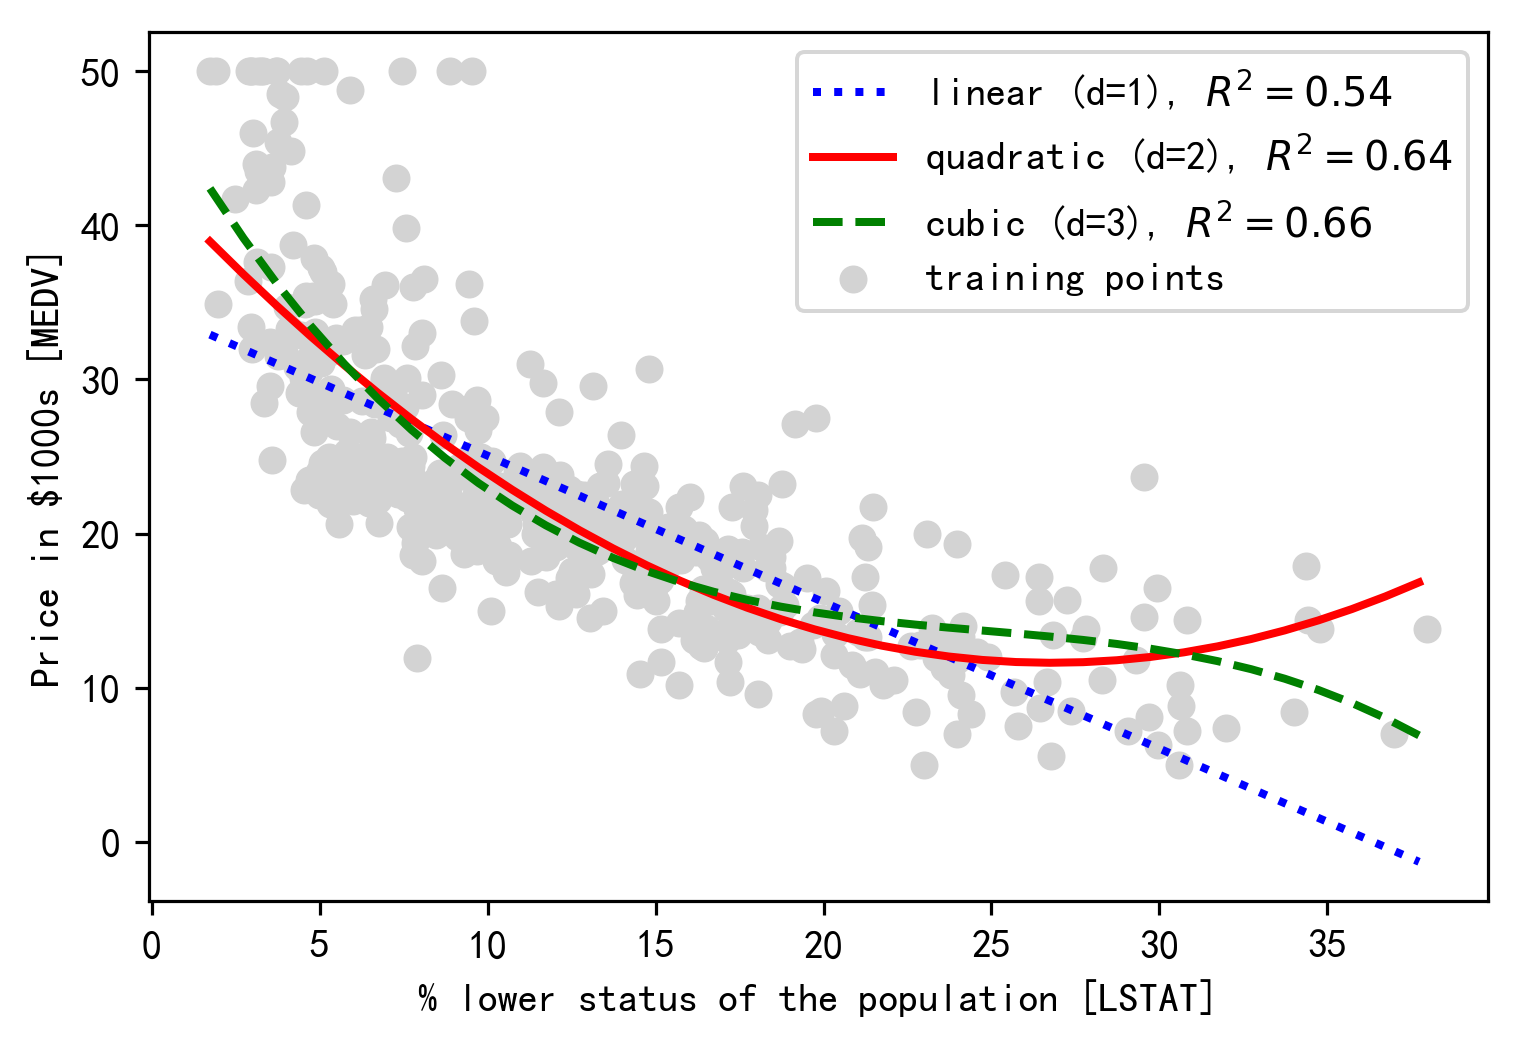

In [18]:
# plot results
plt.figure(dpi=144)
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(
    X_fit,
    y_lin_fit,
    label='linear (d=1), $R^2=%.2f$' % linear_r2,
    color='blue',
    lw=2,
    linestyle=':')

plt.plot(
    X_fit,
    y_quad_fit,
    label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
    color='red',
    lw=2,
    linestyle='-')

plt.plot(
    X_fit,
    y_cubic_fit,
    label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
    color='green',
    lw=2,
    linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')

plt.show()

In [19]:
X = df[['LSTAT']].values
y = df['MEDV'].values

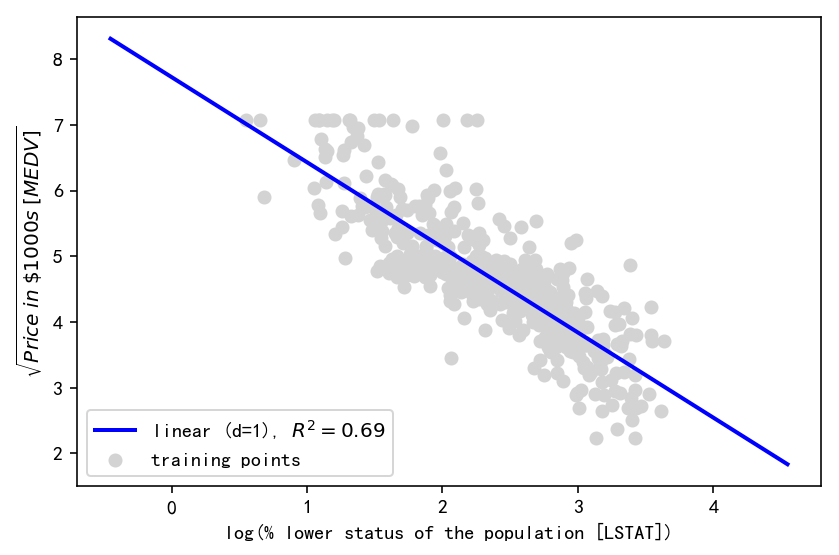

In [20]:
# 把特征取对数
X_log = np.log(X)
#
y_sqrt = np.sqrt(y)

# 为了画预测直线，生成一些等差数列的点
X_fit = np.arange(X_log.min() - 1, X_log.max() + 1, 1)[:, np.newaxis]
#
regr = regr.fit(X_log, y_sqrt)

y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# plot results
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')

plt.plot(
    X_fit,
    y_lin_fit,
    label='linear (d=1), $R^2={:.2f}$'.format(linear_r2),
    color='blue',
    lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

## 决策树回归

In [25]:
X = df[['LSTAT']].values
y = df['MEDV'].values

In [29]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [30]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return

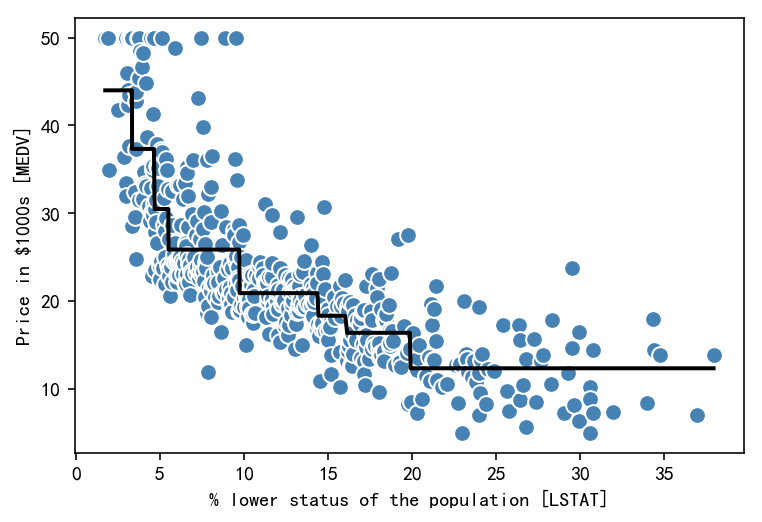

In [31]:
sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')

plt.show()

## 随机森林回归

In [32]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

In [35]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(
    n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [36]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_train_pred)

1.6414409895378974

In [39]:
mean_squared_error(y_test, y_test_pred)

11.055753098768497

In [40]:
r2_score(y_train, y_train_pred)

0.9794899516412922

In [41]:
r2_score(y_test, y_test_pred)

0.8775836858654067

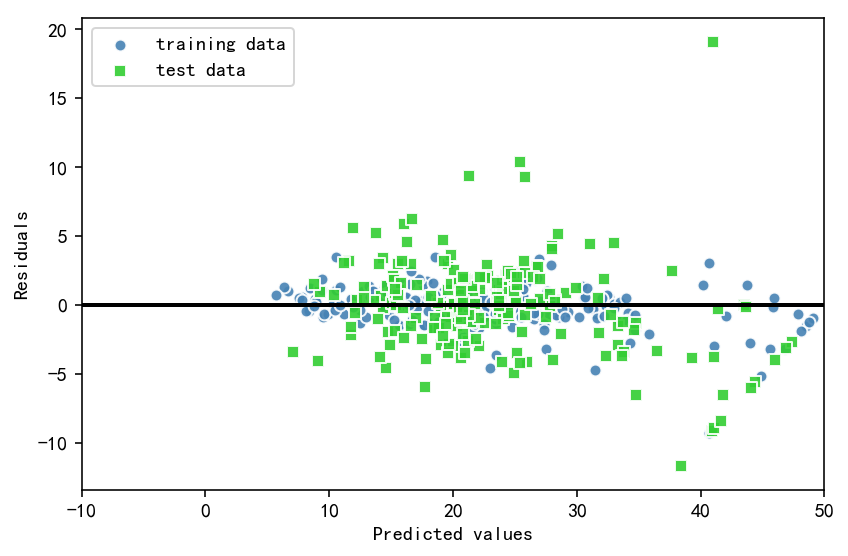

In [43]:
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c='steelblue',
    edgecolor='white',
    marker='o',
    s=35,
    alpha=0.9,
    label='training data')
plt.scatter(
    y_test_pred,
    y_test_pred - y_test,
    c='limegreen',
    edgecolor='white',
    marker='s',
    s=35,
    alpha=0.9,
    label='test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')

plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()